# Preprocess

This step loads the raw fingerprint dataset, extracts label information from filenames, resizes each image from 96×103 to 96×96 to match the expected CNN input shape, and saves the processed arrays for training and evaluation.

We are working with the **Sokoto Coventry Fingerprint Dataset (SOCOFing)**, available on [Kaggle](https://www.kaggle.com/ruizgara/socofing).

Each fingerprint image is labeled with:
- **Subject ID**
- **Gender** (M/F)
- **Hand Side** (Left/Right)
- **Finger Type** (Thumb, Index, Middle, Ring, Little)

The dataset includes both real and synthetically altered fingerprints with three difficulty levels:
- Altered-Easy
- Altered-Medium
- Altered-Hard

<a name='1'></a>
## 1 - Packages

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

<a name='1'></a>
## 2 - Processing

<a name='2.1'></a>
### 2.1 - Image
Loads a grayscale image and resizes it to 96x96.

In [2]:
image_size = (96,96)

def process_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, image_size)

<a name='2.2'></a>
### 2.2 - Labels  
Extracts label information (subject ID, gender, side, finger) from filename. If the image is from an altered dataset, the filename format slightly differs.

In [3]:
finger_labels = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}

def process_label(path, altered = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    subject_id, etc = filename.split('__')
    
    if altered:  gender, side, finger, _, _ = etc.split('_')
    else:        gender, side, finger, _ = etc.split('_')

    # Convert categorical info to integers
    gender = 0 if gender == 'M' else 1
    side = 0 if side =='Left' else 1

    finger = finger_labels[finger]

    return np.array([subject_id, gender, side, finger], dtype=np.uint16)

<a name='2.3'></a>
### 2.3 - Dataset locations 
Different folders for real and altered images, categorized by difficulty.

In [4]:
img_dir = [
    "Real",
    "Altered/Altered-Easy/",
    "Altered/Altered-Medium/",
    "Altered/Altered-Hard/"
]
out_tag = ["real", "easy", "medium", "hard"]

<a name='2.4'></a>
### 2.4 - Loop through  
For each folder:
 - Load and process each image
 - Extract corresponding labels
 - Save images and labels as .npy files

In [5]:
for i_key, i_path in enumerate(img_dir):
    img_list = sorted(glob.glob('dataset/raw/'+ i_path +'/*.BMP'))
            
    imgs = np.empty((len(img_list), image_size[0], image_size[1]), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)

    for i, img_path in enumerate(img_list):
        imgs[i] = process_image(img_path)
        labels[i] = process_label(img_path, i_key != 0)

    np.save('dataset/processed/x_'+out_tag[i_key], imgs)
    np.save('dataset/processed/y_'+out_tag[i_key], labels)

<a name='3'></a>
## 3 - Load Dataset  
Load grayscale fingerprint images and their associated labels from .npy files.


In [6]:
x_real = np.load('dataset/processed/x_real.npy')
y_real = np.load('dataset/processed/y_real.npy')

<a name='2.6'></a>
### 3.1 - Visualize Data  

Display the first 4 images along with label information. 
Titles are human-readable: subject ID, gender, side, and finger type.

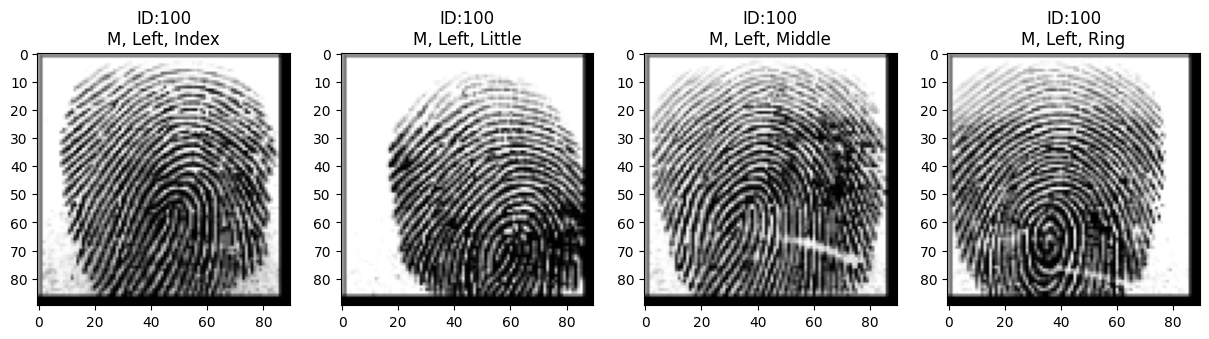

In [7]:
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, 1 + i)
    subject_id, gender, side, finger = y_real[i]
    gender_str = 'M' if gender == 0 else 'F'
    side_str = 'Left' if side == 0 else 'Right'
    finger_str = ['Thumb', 'Index', 'Middle', 'Ring', 'Little'][finger]

    
    plt.title(f"ID:{subject_id}\n{gender_str}, {side_str}, {finger_str}")
    plt.imshow(x_real[i], cmap='gray')